# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Shinta Arjanti
- **Email:** arjantishinta@gmail.com
- **ID Dicoding:** shinta_arjanti

## Menentukan Pertanyaan Bisnis



1.   Faktor cuaca apa yang paling mempengaruhi jumlah peminjaman sepeda?
2.   Bagaimana perbedaan pola peminjaman sepeda antara hari kerja dan akhir pekan, serta jam berapa peminjaman sepeda paling tinggi pada hari kerja dan akhir pekan?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setiap library memiliki fungsi tertentu:


*   Pandas: Untuk manipulasi dan analisis data.
*   Numpy: Untuk melakukan operasi matematika pada array.
*   Matplotlib: Untuk membuat visualisasi statis, animasi, dan interaktif.
*   Seaborn: Untuk gambar antarmuka tingkat tinggi dengan grafik statistik yang menarik.

## Data Wrangling

### Gathering Data

Pada tahap pertama gathering data, kita harus membaca dan mengakses data yang akan kita gunakan terlebih dahulu. karena dataset yang akan kita gunakan berbentuk file csv digunakan fungsi read_csv()

In [ ]:
days_df = pd.read_csv("day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dapat terlihat diatas sudah berhasil memuat dan menampilkan lima baris pertama dari DataFrame days_df dengan beberapa atributnya.


In [ ]:
hours_df = pd.read_csv("hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Begitupun untuk DataFrame hours_df, sudah berhasil dimuat dan menampilkan 5 baris pertama

### Assessing Data

Kemudian dilakukan proses assessing data untuk memeriksa dan mengidentifikasi masalah yang terdapat dalam data.

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil diatas, dapat kita lihat ringkasan informasi dari DataFrame days_df. informasi ini memberikan gambaran umum tentang isi dataset, antara lain:

*   dataset memiliki 731 baris dan 16 kolom.
*   menampilkan tipe data dari setiap kolom. Terlihat juga bahwa untuk kolom tanggal (dteday) masih dalam format object mungkin perlu dikonversi ke datetime, hal tersebut akan kita lakukan pada tahap cleaning data.

Pada tahap selanjutnya dilakukan proses mengidentifikasi dan menghitung total missing value dalam DataFrame dengan menggunakan method isnull(). Selain itu kita juga mengidentifikasi apakah terdapat duplikasi pada DataFrame tersebut dengan menggunakan method duplicated()

In [ ]:
print("Missing values:")
print(days_df.isnull().sum())

print("Duplicate values:", days_df.duplicated().sum())

Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate values: 0


Dari hasil yang didapat, terlihat bahwa tidak terdapat missing values maupun duplicate values pada DataFrame days_df

Dilakukan juga proses assesing data untuk DataFrame hours_df

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil diatas, dapat kita lihat ringkasan informasi dari DataFrame hours_df. informasi ini memberikan gambaran umum tentang isi dataset, antara lain:

*   dataset memiliki 17379 baris dan 17 kolom.
*   menampilkan tipe data dari setiap kolom. Terlihat juga bahwa untuk kolom tanggal (dteday) masih dalam format object mungkin perlu dikonversi ke datetime, hal tersebut akan kita lakukan pada tahap cleaning data.

Begitupun untuk data hour, dilakukan proses identifikasi missing values dan duplicate values

In [ ]:
print("Missing values:")
print(hours_df.isnull().sum())

print("Duplicate values:", hours_df.duplicated().sum())

Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate values: 0


Dari hasil yang didapat, terlihat bahwa pada DataFrame hours_df juga tidak terdapat missing values maupun duplicate values

### Cleaning Data

Pada tahap cleaning data kita mengonversi kolom dteday dalam DataFrame days_df dan hours_df dari tipe data string (atau objek) menjadi tipe data datetime.

In [ ]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Setelah konversi, kolom dteday dalam DataFrame days_df sekarang menyimpan nilai dengan tipe datetime64, bukan lagi object.

In [ ]:
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah konversi, kolom dteday dalam DataFrame hours_df sekarang menyimpan nilai dengan tipe datetime64, bukan lagi object.

## Exploratory Data Analysis (EDA)

Kita akan melihat ringkasan statistik deskriptif dari DataFrame days_df dan hours_df untuk memberikan gambaran umum tentang distribusi dan variasi data dalam DataFrame.


In [ ]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Terdapat **total** **731** entri count dalam dataset, yang menunjukkan bahwa data mencakup 731 hari peminjaman sepeda.
- **Rata-rata** total peminjaman (cnt) adalah **4504.35**, sementara **median** (50%) adalah **4548**. Ini menunjukkan bahwa ada variasi yang cukup kecil antara rata-rata dan median, yang menunjukkan distribusi yang relatif normal di sekitar angka peminjaman yang tinggi.
- **Standar deviasi** untuk jumlah peminjaman (cnt) adalah **1937.21**, yang menunjukkan adanya variasi yang signifikan dalam peminjaman sepeda dari hari ke hari. Ini bisa diakibatkan oleh faktor-faktor seperti cuaca, hari libur, atau acara khusus.
- Nilai **minimum** peminjaman (cnt) adalah **22**, sedangkan **maksimum** adalah **8714**. Hal ini menunjukkan bahwa pada beberapa hari, peminjaman sepeda sangat rendah, sementara pada hari-hari tertentu, peminjaman bisa sangat tinggi.

In [ ]:
hours_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight**:
- Dataset terdiri dari **17,379** entri, yang menunjukkan bahwa data mencakup peminjaman sepeda untuk berbagai jam dalam 731 hari.
- **Rata-rata** jumlah peminjaman (cnt) adalah **189.46**, sementara **median** adalah **142**. Ini menunjukkan bahwa ada variasi yang cukup signifikan antara rata-rata dan median, yang mungkin disebabkan oleh beberapa jam yang memiliki peminjaman sangat tinggi.
- **Standar deviasi** untuk jumlah peminjaman (cnt) adalah **181.39**, menunjukkan adanya variasi yang cukup besar dalam peminjaman sepeda berdasarkan jam.
- Nilai **minimum** peminjaman (cnt) adalah **1**, sedangkan **maksimum** adalah **977**. Hal ini menunjukkan bahwa pada beberapa jam, peminjaman sangat rendah, tetapi pada jam-jam tertentu, peminjaman bisa sangat tinggi.
- Kolom **hr** memiliki rentang nilai dari **0 hingga 23**

# Pertanyaan 1

Untuk pertanyaan 1, kita akan memilih lima kolom dari DataFrame `days_df` yang meliputi suhu (temp), kelembaban (hum), kecepatan angin (windspeed), kondisi cuaca (weathersit), dan jumlah peminjaman sepeda (cnt), kemudian menghitung matriks korelasi untuk mengukur kekuatan dan arah hubungan linear antara setiap pasangan variabel, dan akhirnya mencetak matriks korelasi yang telah dihitung.

In [ ]:
weather_data = days_df[['temp', 'hum', 'windspeed', 'weathersit', 'cnt']]
corr_matrix = weather_data.corr()
print(corr_matrix)

                temp       hum  windspeed  weathersit       cnt
temp        1.000000  0.126963  -0.157944   -0.120602  0.627494
hum         0.126963  1.000000  -0.248489    0.591045 -0.100659
windspeed  -0.157944 -0.248489   1.000000    0.039511 -0.234545
weathersit -0.120602  0.591045   0.039511    1.000000 -0.297391
cnt         0.627494 -0.100659  -0.234545   -0.297391  1.000000


# Pertanyaan 2

In [ ]:
workingday_trend = hours_df.groupby('workingday')['cnt'].sum().reset_index()
workingday_trend['workingday'] = workingday_trend['workingday'].map({0: 'Weekend', 1: 'Working Day'})

workingday_trend

,workingday,cnt
0,Weekend,1000269
1,Working Day,2292410


Pada tahap diatas, kita menghitung total peminjaman sepeda berdasarkan kategori hari kerja dan akhir pekan. Dapat dilihat bahwa total peminjaman sepeda jauh lebih tinggi pada hari kerja (2,292,410 peminjaman) dibandingkan dengan akhir pekan (1,000,269 peminjaman).

In [ ]:
hourly_trend = hours_df.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()
hourly_trend['workingday'] = hourly_trend['workingday'].map({0: 'Weekend', 1: 'Working Day'})

hourly_trend

,workingday,hr,cnt
0,Weekend,0,90.800000
1,Weekend,1,69.508696
2,Weekend,2,53.171053
3,Weekend,3,25.775330
4,Weekend,4,8.264317
5,Weekend,5,8.689189
6,Weekend,6,18.742358
7,Weekend,7,43.406926
8,Weekend,8,105.653680
9,Weekend,9,171.623377


Pada tahap diatas, kita menghitung rata-rata peminjaman sepeda per jam pada hari kerja dan akhir pekan. Dari output terlihat bahwa:
- Rata-rata peminjaman sepeda lebih tinggi pada jam-jam tertentu pada **hari kerja** dibandingkan dengan akhir pekan. Misalnya, jam 17 pada hari kerja mencatatkan peminjaman tertinggi dengan rata-rata **525.29**, sedangkan peminjaman pada akhir pekan tidak pernah mencapai angka setinggi itu.
- Pada **akhir pekan**, peminjaman sepeda cenderung meningkat di pagi hari (jam 8 hingga 12), dengan angka tertinggi berada di jam 12 (**366.26** peminjaman).

## Visualization & Explanatory Analysis

# Pertanyaan 1

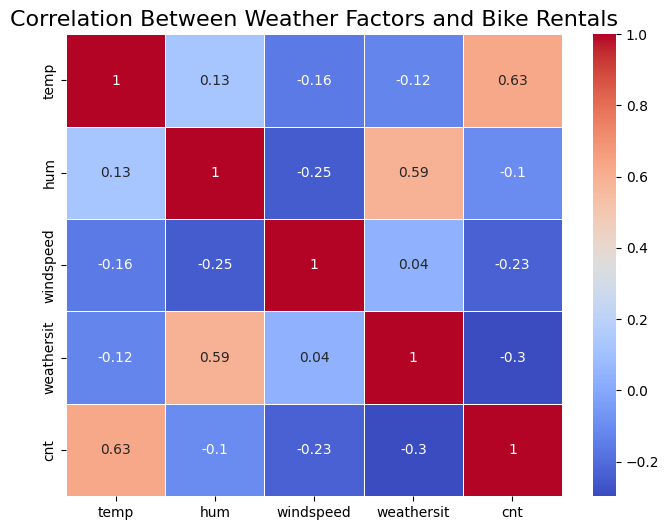

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Between Weather Factors and Bike Rentals', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Heatmap korelasi diatas menunjukkan korelasi antar variabel, di mana warna yang lebih merah menunjukkan korelasi positif yang lebih kuat, sedangkan warna yang lebih biru menunjukkan korelasi negatif yang lebih kuat. Dari hasil visualisasi, dapat dilihat:
- **Temperature (temp) vs Jumlah Peminjaman Sepeda (cnt)**

    Korelasi: **0.63**. Ada hubungan positif yang cukup kuat antara suhu dan jumlah peminjaman sepeda. Ini menunjukkan bahwa ketika suhu meningkat, jumlah peminjaman sepeda juga cenderung meningkat.

- **Humidity (hum) vs Jumlah Peminjaman Sepeda (cnt)**

    Korelasi: **-0.1**. Hubungan negatif yang sangat lemah antara kelembaban dan jumlah peminjaman sepeda. Kelembaban tidak memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.

- **Windspeed (windspeed) vs Jumlah Peminjaman Sepeda (cnt)**

    Korelasi: **-0.23**. Ada hubungan negatif moderat antara kecepatan angin dan jumlah peminjaman sepeda. Ini menunjukkan bahwa ketika kecepatan angin meningkat, jumlah peminjaman sepeda cenderung menurun.

- **Weather Situation (weathersit) vs Jumlah Peminjaman Sepeda (cnt)**

    Korelasi: **-0.3**. Ada hubungan negatif moderat antara kondisi cuaca dan jumlah peminjaman sepeda. Kondisi cuaca yang lebih buruk (misalnya, hujan atau kabut) cenderung mengurangi jumlah peminjaman sepeda.


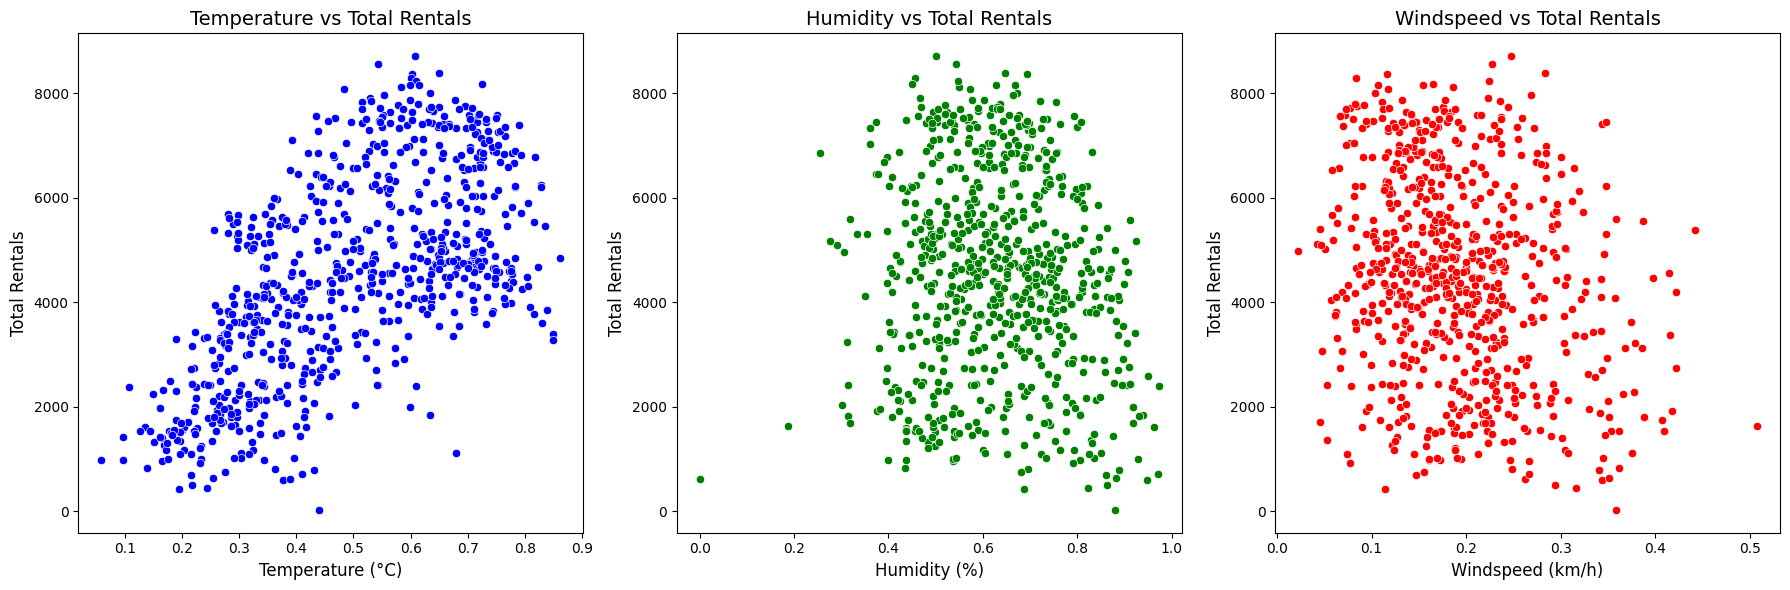

In [ ]:
plt.figure(figsize=(18, 6))

# Suhu vs Jumlah Peminjaman Sepeda
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=days_df, color="blue")
plt.title('Temperature vs Total Rentals', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Kelembapan vs Jumlah Peminjaman Sepeda
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=days_df, color="green")
plt.title('Humidity vs Total Rentals', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Kecepatan Angin vs Jumlah Peminjaman Sepeda
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=days_df, color="red")
plt.title('Windspeed vs Total Rentals', fontsize=14)
plt.xlabel('Windspeed (km/h)', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Berdasar visualisasi scatter plot yang dihasilkan, dapat dilihat:


*   **Suhu vs Jumlah Peminjaman Sepeda**: Terlihat bahwa ketika suhu meningkat, jumlah peminjaman sepeda juga cenderung meningkat. Pada suhu yang lebih rendah, peminjaman sepeda lebih sedikit.

*   **Kelembapan vs Jumlah Peminjaman Sepeda**: Terjadi sedikit penurunan pada jumlah peminjaman ketika kelembapan berada di atas angka tertentu (sekitar 0.6).

*   **Kecepatan Angin vs Jumlah Peminjaman Sepeda**: Tidak ada pola jelas antara kecepatan angin dan jumlah peminjaman sepeda. Namun, terlihat bahwa saat kecepatan angin mendekati 0.3-0.4 (km/h), jumlah peminjaman masih cukup tinggi, meskipun di atas angka tersebut peminjaman sepeda sedikit menurun.






# Pertanyaan 2

<ipython-input-18-0456c3ecc68d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=workingday_trend, palette='muted')


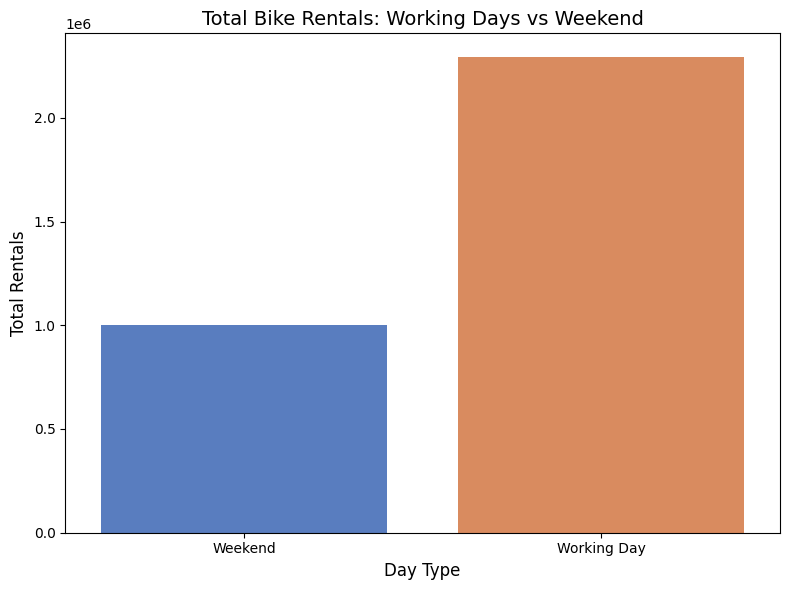

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_trend, palette='muted')
plt.title('Total Bike Rentals: Working Days vs Weekend', fontsize=14)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Weekend', 'Working Day'], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan perbandingan jumlah peminjaman sepeda antara hari kerja (Working Day) dan akhir pekan (Weekend). Terlihat bahwa jumlah peminjaman sepeda **lebih tinggi** pada **hari kerja** dibandingkan pada hari libur.

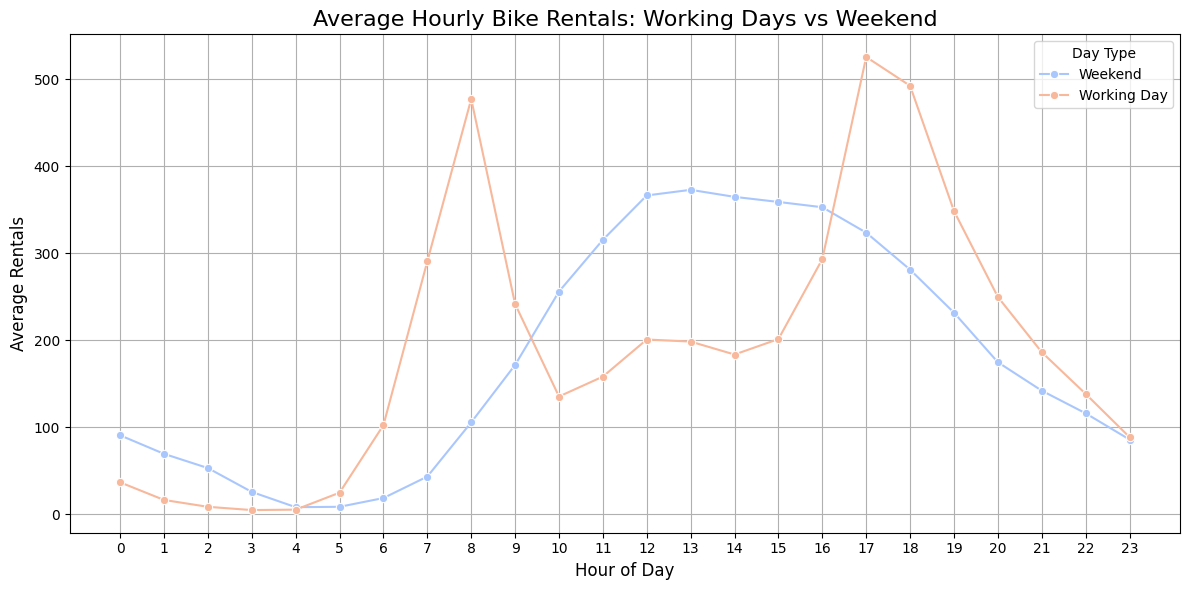

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=hourly_trend, marker='o', palette='coolwarm')

plt.title('Average Hourly Bike Rentals: Working Days vs Weekend', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan pola peminjaman sepeda berdasarkan jam untuk hari kerja dan akhir pekan. Berikut adalah beberapa pola yang dapat kita amati:
*   Hari Kerja (Working Day) : ada dua puncak peminjaman yang jelas: satu di pagi hari (jam 8) dan yang lainnya di sore hari (jam 17).
*   Akhir Pekan (Weekend) : Pola peminjaman lebih merata sepanjang hari, dengan puncak peminjaman terjadi sekitar jam 12 hingga 16.

## Analisis Lanjutan

Untuk analisis lanjutan, saya akan menggunakan teknik **Binning**. Dalam hal ini saya menggunakan teknik Binning untuk membagi data peminjaman sepeda berdasarkan jam ke dalam beberapa kategori untuk pengguna terdaftar maupun pengguna kasual.

pertama, dengan menggunakan fungsi pd.cut(), kita mengelompokkan kolom hr (jam) dalam DataFrame hours_df ke dalam empat kategori waktu: Night (malam), Morning (pagi), Afternoon (siang), dan Evening (sore). Rentang waktu untuk setiap kategori ditentukan dalam daftar hour_bins, dan hasilnya disimpan dalam kolom baru.

In [ ]:
hour_bins = [0, 6, 12, 18, 24]
hour_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

hours_df['hour_binned'] = pd.cut(hours_df['hr'], bins=hour_bins, labels=hour_labels, include_lowest=True)

Selanjutnya, kita menghitung rata-rata peminjaman sepeda (cnt), peminjaman oleh pengguna casual, dan pengguna terdaftar untuk setiap kategori waktu dengan menggunakan fungsi groupby().

In [ ]:
binned_data = hours_df.groupby('hour_binned')[['cnt', 'casual', 'registered']].mean().reset_index()
print(binned_data)

  hour_binned         cnt     casual  registered
0       Night   32.321736   4.457508   27.864227
1     Morning  237.589044  39.662847  197.926198
2   Afternoon  324.137143  71.990400  252.146743
3     Evening  185.806868  30.142308  155.664560


<ipython-input-21-d0cb0e869433>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = hours_df.groupby('hour_binned')[['cnt', 'casual', 'registered']].mean().reset_index()


Dari output, terlihat pola berikut:

*   Night: Aktivitas peminjaman sangat rendah, terutama untuk pengguna terdaftar.
*   Morning: Peminjaman meningkat drastis, dengan pengguna terdaftar lebih dominan.
*   Afternoon: Puncak peminjaman
*   Evening: Peminjaman menurun, tetapi tetap lebih tinggi dibandingkan night.

Insight ini menunjukkan bahwa afternoon adalah periode paling sibuk (puncak waktu peminjaman) dengan nilai 324.14, untuk tipe pengguna terdaftar maupun kasual.

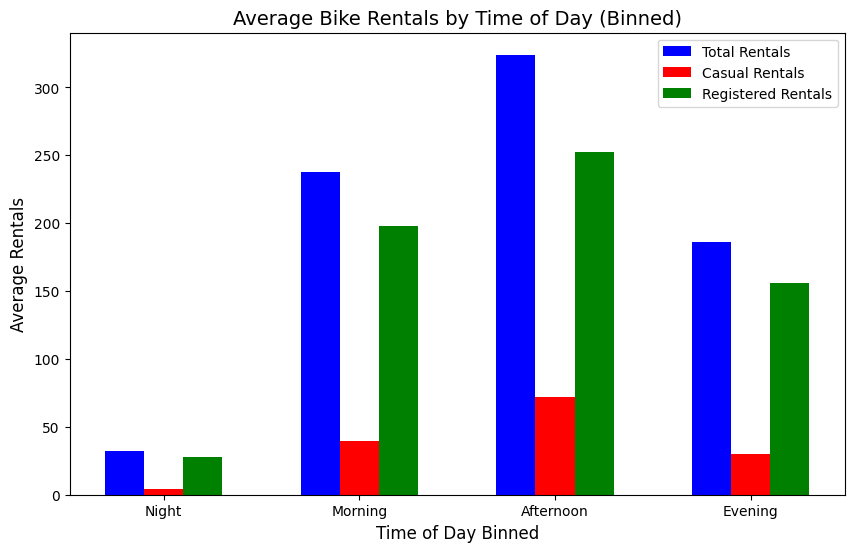

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = range(len(binned_data))

# Total Rentals
plt.bar(x, binned_data['cnt'], width=bar_width, label='Total Rentals', color='blue', align='center')

# Casual Rentals
plt.bar([p + bar_width for p in x], binned_data['casual'], width=bar_width, label='Casual Rentals', color='red', align='center')

# Registered Rentals
plt.bar([p + bar_width * 2 for p in x], binned_data['registered'], width=bar_width, label='Registered Rentals', color='green', align='center')

plt.title('Average Bike Rentals by Time of Day (Binned)', fontsize=14)
plt.xlabel('Time of Day Binned', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks([p + bar_width for p in x], binned_data['hour_binned'])
plt.legend()
plt.show()

Dari visualisasi, kita dapat melihat pola peminjaman sebagai berikut:
*   Peminjaman sepeda **tertinggi** terjadi pada kategori **Afternoon** (Siang) dengan nilai sekitar **324.14**. Ini menunjukkan bahwa pada siang hari, pengguna lebih banyak memanfaatkan sepeda.
*   Kategori **Night** (Malam) menunjukkan rata-rata peminjaman yang **terendah**, hanya sekitar **32.32**. Ini mungkin mencerminkan kurangnya aktivitas luar ruangan di malam hari atau ketidaknyamanan menggunakan sepeda saat gelap.
*   Peminjaman oleh **registered users** (pengguna terdaftar) jauh **lebih tinggi** dibandingkan casual users (pengguna tidak terdaftar) di semua kategori waktu. Ini menunjukkan bahwa pengguna terdaftar lebih cenderung untuk meminjam sepeda di berbagai waktu sepanjang hari.

## Conclusion

**- Conclution pertanyaan 1**

Dari analisis yang dilakukan, faktor cuaca yang paling mempengaruhi jumlah peminjaman sepeda adalah **suhu**. Ketika suhu meningkat, jumlah peminjaman sepeda juga cenderung meningkat, menunjukkan hubungan positif yang kuat.

Di sisi lain, kelembaban memiliki pengaruh yang sangat lemah terhadap jumlah peminjaman, sementara kecepatan angin dan kondisi cuaca menunjukkan hubungan negatif, di mana peningkatan kecepatan angin dan kondisi cuaca yang buruk cenderung mengurangi minat masyarakat untuk menyewa sepeda.

**- Conclution pertanyaan 2**

Pola peminjaman sepeda menunjukkan perbedaan yang jelas antara hari kerja dan akhir pekan. Hari kerja mencatat jumlah peminjaman yang jauh lebih tinggi, dengan dua puncak utama di pagi hari dan sore hari, yang mencerminkan penggunaan sepeda untuk perjalanan kerja dan pulang. Sebaliknya, pada akhir pekan, peminjaman lebih merata sepanjang hari dengan puncak di sekitar jam 12 hingga 16, mencerminkan penggunaan sepeda untuk aktivitas rekreasi dan bersantai.

In [ ]:
days_df.to_csv("days_data.csv", index=False)
hours_df.to_csv("hours_data.csv", index=False)